In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import optimize
from scipy.optimize import minimize
%matplotlib inline
random.seed(1917)
np.random.seed(1917)

In [2]:
alpha = random.uniform(0, 1)
beta = random.uniform(0, 1)

x = np.array([i/100 for i in range(100)])
y = np.array([alpha * x[i] + beta + np.random.standard_normal(1) for i in range(100)])

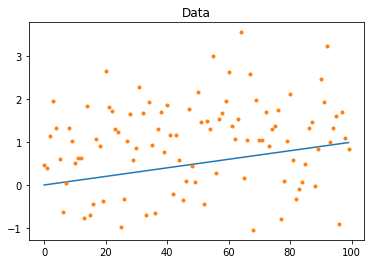

In [43]:
plt.plot(x)
plt.plot(y, '.')
plt.title('Data')

In [28]:
def loss_linear(a, x_=x, y_=y):
    a, b = a
    return sum([((a * x_[i] + b) - y_[i])**2 for i in range(len(x_))])

def loss_rational(a, x_=x, y_=y):
    a, b = a
    return sum([(a / (1 + b * x_[i]) - y_[i])**2 for i in range(len(x_))])

# Gradient descent

In [3]:
import torch
torch.manual_seed(1917)

a_lin = torch.tensor(1., requires_grad=True)
b_lin = torch.tensor(1., requires_grad=True)
x_torch = torch.FloatTensor(x)
y_torch = torch.FloatTensor(y)

gamma = 0.00001
it = 0

for i in range(40):
#while :
    print(it)
    it +=1

    y_pred = a_lin * x_torch + b_lin
    #loss = torch.mean((y_pred - y_torch) ** 2)
    loss = torch.nn.MSELoss(reduction='sum')#sum((y_pred - y_torch) ** 2)
    losses = loss(y_pred, y_torch)

    # backward
    losses.backward()
    print('a:', a_lin)
    print('b:', b_lin)
    print('')
    print(losses)

    with torch.no_grad():
        a_lin = a_lin - gamma * a_lin.grad
        b_lin = b_lin - gamma * b_lin.grad
    a_lin.requires_grad = True
    b_lin.requires_grad = True

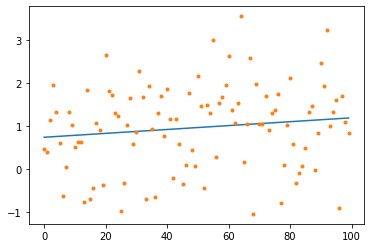

In [9]:
plt.plot(a_lin.detach().numpy() * x + b_lin.detach().numpy())
plt.plot(y, '.')

In [7]:
import torch
torch.manual_seed(1917)

a = torch.tensor(2., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
x_torch = torch.FloatTensor(x)
y_torch = torch.FloatTensor(y)

gamma = 1
it = 0

for i in range(1000):
#while :
    print(it)
    it +=1
    # use new weight to calculate loss
    y_pred = a / (1 + b * x_torch)
    #loss = torch.mean((y_pred - y_torch) ** 2)
    loss = torch.nn.MSELoss(reduction='sum')#sum((y_pred - y_torch) ** 2)
    losses = loss(y_pred, y_torch)

    # backward
    losses.backward()
    print('a:', a)
    print('b:', b)
    print('')
    print(losses)
    with torch.no_grad():
        a = a - 0.00001 * a.grad
        b = b - 0.00001 * b.grad
    a.requires_grad = True
    b.requires_grad = True

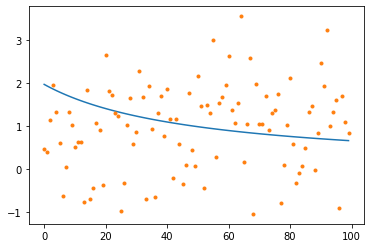

In [10]:
plt.plot(a.detach().numpy() / (1+ b.detach().numpy()*x))
plt.plot(y, '.')

# Conjugate descent

In [29]:
x0 = np.array([3,1])
cg_lin = minimize(loss_linear, x0, method='CG', options={'disp':True})

Optimization terminated successfully.
         Current function value: 94.423449
         Iterations: 12
         Function evaluations: 60
         Gradient evaluations: 20


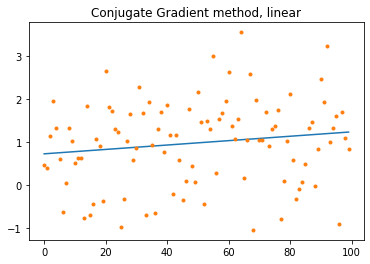

In [51]:
plt.plot(cg_lin.x[0]*x+cg_lin.x[1])
plt.title('Conjugate Gradient method, linear')
plt.plot(y, '.')

In [52]:
x0 = np.array([1,1])
cg_rat = minimize(loss_rational, x0, method='CG', options={'disp':True})
cg_rat.x

Optimization terminated successfully.
         Current function value: 94.754845
         Iterations: 12
         Function evaluations: 87
         Gradient evaluations: 29


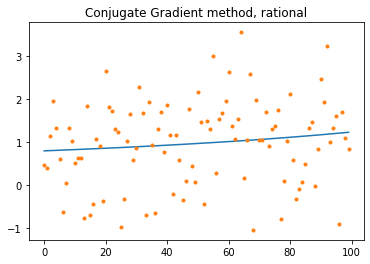

In [53]:
plt.plot(cg_rat.x[0] / (1+ cg_rat.x[1] * x))
plt.plot(y, '.')
plt.title('Conjugate Gradient method, rational')

# Newton's method

In [30]:
x0 = np.array([1,1])
fprime = lambda xx: optimize.approx_fprime(xx, loss_linear, 0.01)
newton_lin = optimize.minimize(loss_linear, x0, method='Newton-CG', tol=0.001, jac=fprime, options={'disp':True})

Optimization terminated successfully.
         Current function value: 94.426782
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 17
         Hessian evaluations: 0


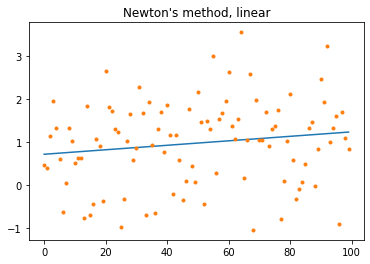

In [56]:
plt.plot(newton_lin.x[0] *x + newton_lin.x[1])
plt.plot(y, '.')
plt.title("Newton's method, linear")

In [57]:
x0 = np.array([1,1])
fprime = lambda xx: optimize.approx_fprime(xx, loss_rational, 0.01)
newton_rat = optimize.minimize(loss_rational, x0, method='Newton-CG', tol=0.001, jac=fprime, options={'disp':True})

         Current function value: 94.755318
         Iterations: 9
         Function evaluations: 37
         Gradient evaluations: 53
         Hessian evaluations: 0


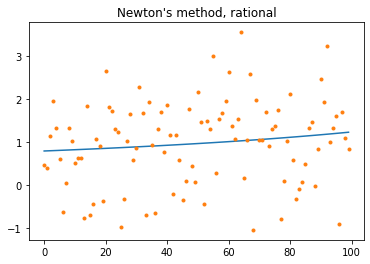

In [59]:
plt.plot(newton_rat.x[0] / (1+ newton_rat.x[1]*x))
plt.plot(y, '.')
plt.title("Newton's method, rational")

# Levenberg Marquardt

In [31]:
def linear(a, x_=x, y_=y):
    a, b = a
    return np.array([(a * x_[i] + b) - y_[i] for i in range(100)]).squeeze()

In [32]:
x0 = np.array([1, 1])
lm_linear = optimize.least_squares(linear, x0, method='lm', verbose=1)

`gtol` termination condition is satisfied.
Function evaluations 6, initial cost 6.1418e+01, final cost 4.7212e+01, first-order optimality 1.04e-07.


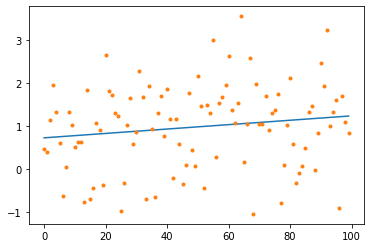

In [64]:
plt.plot(lm_linear.x[0]*x+lm_linear.x[1])
plt.plot(y, '.')

In [7]:
def rational(a, x_=x, y_=y):
    a, b = a
    return np.array([(a / (1 + b * x_[i]) - y_[i])**2 for i in range(len(x_))]).squeeze()
x0 = np.array([1,1])
lm_rational = optimize.least_squares(rational, x0, method='lm', verbose=1, xtol=0.001, ftol=0.001)

`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 1.6858e+02, final cost 1.2094e+02, first-order optimality 2.42e+00.


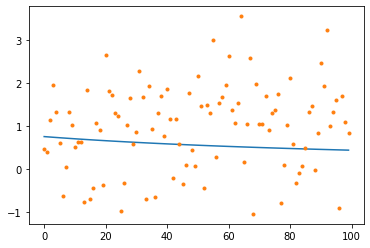

In [67]:
plt.plot(lm_rational.x[0] / (1+lm_linear.x[1]*x))
plt.plot(y, '.')

# all

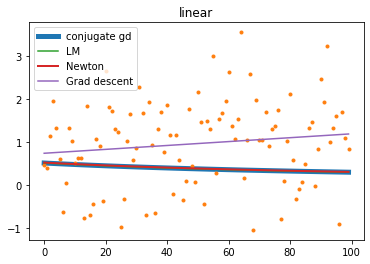

In [33]:
plt.plot(cg_lin.x[0] / (1+ cg_lin.x[1] * x), label='conjugate gd', linewidth=5)
plt.plot(y, '.')

plt.plot(lm_linear.x[0] / (1+lm_linear.x[1]*x), label='LM')
plt.plot(newton_lin.x[0] / (1+ newton_lin.x[1]*x), label='Newton', linewidth=2)
plt.plot(a_lin.detach().numpy() * x + b_lin.detach().numpy(), label='Grad descent')


plt.title("linear")
plt.legend()

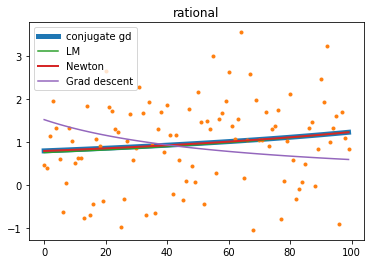

In [69]:
plt.plot(cg_rat.x[0] / (1+ cg_rat.x[1] * x), label='conjugate gd', linewidth=5)
plt.plot(y, '.')

plt.plot(lm_rational.x[0] / (1+lm_rational.x[1]*x), label='LM')
plt.plot(newton_rat.x[0] / (1+ newton_rat.x[1]*x), label='Newton', linewidth=2)
plt.plot(a.detach().numpy() / (1+ x * b.detach().numpy()), label='Grad descent')


plt.title("rational")
plt.legend()